In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log
from statistics import mode 
import random
from sklearn.metrics import accuracy_score
random.seed(0)

In [26]:
class DecisionTree():
    class Node():
        def __init__(self,column,value,true_child,false_child):
            self.column = column
            self.value = value
            self.true_child = true_child
            self.false_child = false_child

    class Leaf_Node():
        def __init__(self,labels):
            freq={}
            for label in labels:
                if label not in freq:
                    freq[label]=0
                freq[label] = freq[label] + 1
            self.result=freq

    def query(self,data,column,value):
        return data[column] >= value

    def partition(self,data,col,value):
        true = []
        false = []
        for row in data:
            if self.query(row,col,value):
                true.append(row)
            else:
                false.append(row)
        return np.array(true),np.array(false)
    def entropy_impurity(self,labels):
        freq={}
        for label in  labels:
            if label not in freq:
                freq[label]=0
            freq[label] = freq[label] + 1
        impurity=1
        for label in freq:
            impurity = impurity - (freq[label]/len(labels))*(log((freq[label]/len(labels)))/log(2))
        return impurity
    
    def info_gain_entropy(self,current,left,right):
        return current-((len(left))/(len(left)+len(right)))*self.entropy_impurity(left)-(1-((len(left))/(len(left)+len(right))))*self.entropy_impurity(right)
    
    def best_split(self,data,features):
        best_gain=0
        best_col = 0
        best_val = 0
        if features <= data.shape[1]-1:
            feature_cols = random.sample(range(0,data.shape[1]-1),features)
        else:
            feature_cols = range(len(data[0])-1)
        
        current=self.entropy_impurity(data[:,-1])

        for col in feature_cols:
            for val in np.unique(data[:,col]):
                true,false=self.partition(data,col,val)
                if len(true)==0 or len(false) ==0:
                    continue
                gain=self.info_gain_entropy(current,np.array(true)[:,-1],np.array(false)[:,-1])
                if gain>=best_gain:
                    best_gain = gain
                    best_col = col
                    best_val = val 
        return best_gain,best_col,best_val

    def learn(self, training_set,features):
        # implement this function
        self.tree = self.build_tree(training_set,features)
    
    def build_tree(self,training_set,features):
        gain,col,val=self.best_split(training_set,features)
        if gain == 0:
            return self.Leaf_Node(training_set[:,-1])
        true,false = self.partition(training_set,col,val)
        true_child = self.build_tree(true,features)
        false_child = self.build_tree(false,features)
        return self.Node(col,val, true_child, false_child)
    

    # implement this function
    def classify(self,test_data):
        temp = self.tree
        while isinstance(temp,self.Leaf_Node) == False:
            if test_data[temp.column] >= temp.value:
                temp = temp.true_child
            else:
                temp = temp.false_child

            if isinstance(temp,self.Leaf_Node):
                return list(temp.result.keys())[list(temp.result.values()).index(max(temp.result.values()))]


In [27]:
def data_split(data,no_of_samples):
    sample_rows = [random.randrange(0,len(data)) for x in range(no_of_samples)]
    sample_data = data[sample_rows, :]
    return np.array(sample_data),np.array(sample_rows)

    
def accuracy(y_true,y_pred):
    conf_matrix = np.zeros(shape=(2,2))
    for i in range(len(y_true)):
        conf_matrix[int(y_true[i])][int(y_pred[i])] = conf_matrix[int(y_true[i])][int(y_pred[i])]+1
    accuracy_value = (conf_matrix[0][0]+conf_matrix[1][1])/(np.sum(conf_matrix))

    return accuracy_value


In [28]:
def run_decision_tree(num_trees,num_samples,num_features):
    data = np.array(pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn//datasets/spam.data',delimiter=' ',header=None))
    split_ratio = 0.7
    test_accuracy_list = []
    orig_train_data = data[:int(split_ratio*len(data)),:]
    test_data = data[int(split_ratio*len(data)):,:]

    test_preds = []
    final_preds = []
    for iter in range(num_trees):
        single_test_preds = []
        train_data,sample_rows = data_split(orig_train_data,num_samples)
        tree = DecisionTree()
        tree.learn(train_data,num_features)
        test_results = []
        for instance in test_data:
            result = tree.classify( instance[:-1] )
            single_test_preds.append(result)
            test_results.append( result == instance[-1])
        test_acc = float(test_results.count(True))/float(len(test_results))
        test_accuracy_list.append(test_acc)

        test_preds.append(single_test_preds)

    for i in range(len(test_data)):
        final_preds.append(mode(np.array(test_preds)[:,i]))

    test_acc = round(accuracy(test_data[:,-1],final_preds)*100,2)
    print("Overall Test Accuracy:",test_acc,"%")
    return test_acc


In [29]:
test_acc = run_decision_tree(11,100,8)

Overall Test Accuracy: 80.09 %


In [32]:
from sklearn.ensemble import RandomForestClassifier
data = np.array(pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn//datasets/spam.data',delimiter=' ',header=None))

X_train = data[:int(0.7*len(data)),:(data.shape[1]-1)]
y_train = data[:int(0.7*len(data)),data.shape[1]-1]
X_test = data[int(0.7*len(data)):,0:data.shape[1]-1]
y_test = data[int(0.7*len(data)):,data.shape[1]-1]
                    
print("Overall Test Accuracy : ",round(accuracy_score(y_test,RandomForestClassifier(n_estimators=11,max_samples=100,max_features = 8).fit(X_train,y_train).predict(X_test))*100,2),"%")

Overall Test Accuracy :  80.45 %


Overall Test Accuracy: 81.17 %
Overall Test Accuracy: 86.46 %
Overall Test Accuracy: 84.36 %
Overall Test Accuracy: 81.61 %
Overall Test Accuracy: 80.45 %
Overall Test Accuracy: 76.83 %
Overall Test Accuracy: 75.6 %
Overall Test Accuracy: 77.05 %
Overall Test Accuracy: 83.27 %
Overall Test Accuracy: 81.82 %
Overall Test Accuracy: 74.15 %


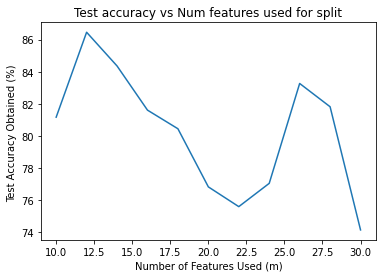

In [33]:
test_arr =[]
for m in range(10,31,2):
    test_acc = run_decision_tree(11,100,m)
    test_arr.append(test_acc)

plt.plot(range(10,31,2),test_arr)
plt.xlabel('Number of Features Used (m)')
plt.ylabel('Test Accuracy Obtained (%) ')
plt.title('Test accuracy vs Num features used for split')
plt.show()

In [34]:
def run_decision_tree_OOB(num_trees,num_samples,num_features):
    data = np.array(pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn//datasets/spam.data',delimiter=' ',header=None))
    split_ratio = 0.7
    orig_train_data = data[:int(split_ratio*len(data)),:]
    test_data = data[int(split_ratio*len(data)):,:]
    global_oob_preds = []
    final_oob_preds = []
    test_preds = []
    final_preds = []
    for iter in range(num_trees):
        single_test_preds = []
        single_oob_preds = ['*' for i in range(len(orig_train_data))]

        train_data,sample_rows = data_split(orig_train_data,num_samples)

        out_data = np.delete(orig_train_data,sample_rows,axis = 0)
        out_rows = np.delete(range(len(orig_train_data)),sample_rows)
        tree = DecisionTree()
        tree.learn(train_data,num_features)

        for instance in test_data:
            result = tree.classify( instance[:-1] )
            single_test_preds.append(result)

        for instance in range(len(out_data)):
            result = tree.classify( out_data[instance,:-1] )
            single_oob_preds[out_rows[instance]] = result

        test_preds.append(single_test_preds)
        global_oob_preds.append(single_oob_preds)

    for i in range(len(test_data)):
        final_preds.append(mode(np.array(test_preds)[:,i]))

    for i in range(len(orig_train_data)):
        freq_count = {'*':0,'1.0':0,'0.0':0}
        for entry in np.array(global_oob_preds)[:,i]:
            freq_count[entry] = freq_count[entry]+1 

        if freq_count['1.0'] == freq_count['0.0']:
            final_oob_preds.append(random.choice(['1.0','0.0']))
        elif freq_count['*'] == freq_count['0.0']:
            final_oob_preds.append('0.0')
        elif freq_count['*'] == freq_count['1.0']:
            final_oob_preds.append('1.0')
        elif (freq_count['*'] > freq_count['1.0']) and (freq_count['*'] > freq_count['0.0']):
            if (freq_count['1.0'] > freq_count['0.0']):
                final_oob_preds.append('1.0')
            else:
                final_oob_preds.append('0.0')
        else:
            final_oob_preds.append(mode(np.array(global_oob_preds)[:,i]))

    no_oob_rows = [i for i, x in enumerate(final_oob_preds) if x == '*']
    OOB_acc = round(accuracy(np.delete(orig_train_data[:,-1],sample_rows).astype(np.float),np.delete(np.array(final_oob_preds),sample_rows).astype(np.float))*100,2)
    print("OOB Accuracy: ",OOB_acc,"%")


    test_acc = round(accuracy(test_data[:,-1],final_preds)*100,2)
    print("Overall Test Accuracy:",test_acc,"%")
    return OOB_acc,test_acc


OOB Accuracy:  63.63 %
Overall Test Accuracy: 82.98 %
OOB Accuracy:  61.9 %
Overall Test Accuracy: 81.82 %
OOB Accuracy:  59.62 %
Overall Test Accuracy: 82.19 %
OOB Accuracy:  57.22 %
Overall Test Accuracy: 76.25 %
OOB Accuracy:  60.67 %
Overall Test Accuracy: 82.84 %
OOB Accuracy:  59.14 %
Overall Test Accuracy: 86.89 %


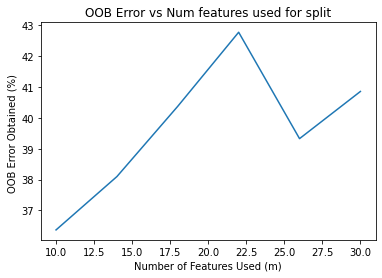

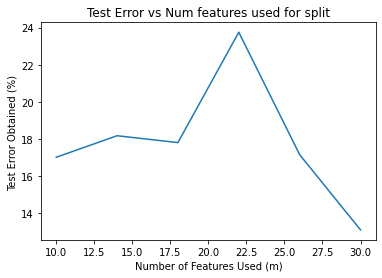

In [36]:
OOB_arr = []
test_arr =[]
for m in range(10,31,4):
    OOB_acc, test_acc = run_decision_tree_OOB(11,100,m)
    OOB_arr.append(100-OOB_acc)
    test_arr.append(100-test_acc)

plt.plot(range(10,31,4),OOB_arr)
plt.xlabel('Number of Features Used (m)')
plt.ylabel('OOB Error Obtained (%) ')
plt.title('OOB Error vs Num features used for split')
plt.show()
plt.plot(range(10,31,4),test_arr)
plt.xlabel('Number of Features Used (m)')
plt.ylabel('Test Error Obtained (%) ')
plt.title('Test Error vs Num features used for split')
plt.show()